# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

('March 31, 2018', '340900000000')
('December 31, 2017', '328800000000')
('September 30, 2017', '298500000000')
('June 30, 2017', '279000000000')
('March 31, 2017', '269600000000')
('December 31, 2016', '228500000000')
('September 30, 2016', '229800000000')
('June 30, 2016', '127000000000')
('March 31, 2016', '114700000000')
('December 31, 2015', '121400000000')
('September 30, 2015', '93679M')
('June 30, 2015', '95498M')
('March 31, 2015', '93988M')
('December 31, 2014', '95666M')
('September 30, 2014', '85180M')
('June 30, 2014', '76935M')
('March 31, 2014', '62054M')
('December 31, 2013', '61522M')
('September 30, 2013', '43135M')
('June 30, 2013', '40514M')
('March 31, 2013', '56179M')
('December 31, 2012', '30633M')
('September 30, 2012', '5010M')
('June 30, 2012', '2665M')
('March 31, 2012', '3017M')
('June 30, 2024', '255000000000')
('March 31, 2024', '213000000000')
('December 31, 2023', '251700000000')
('September 30, 2023', '233500000000')
('June 30, 2023', '249300000000')
('

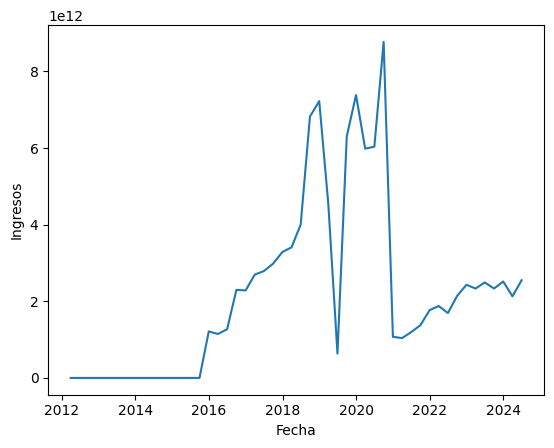

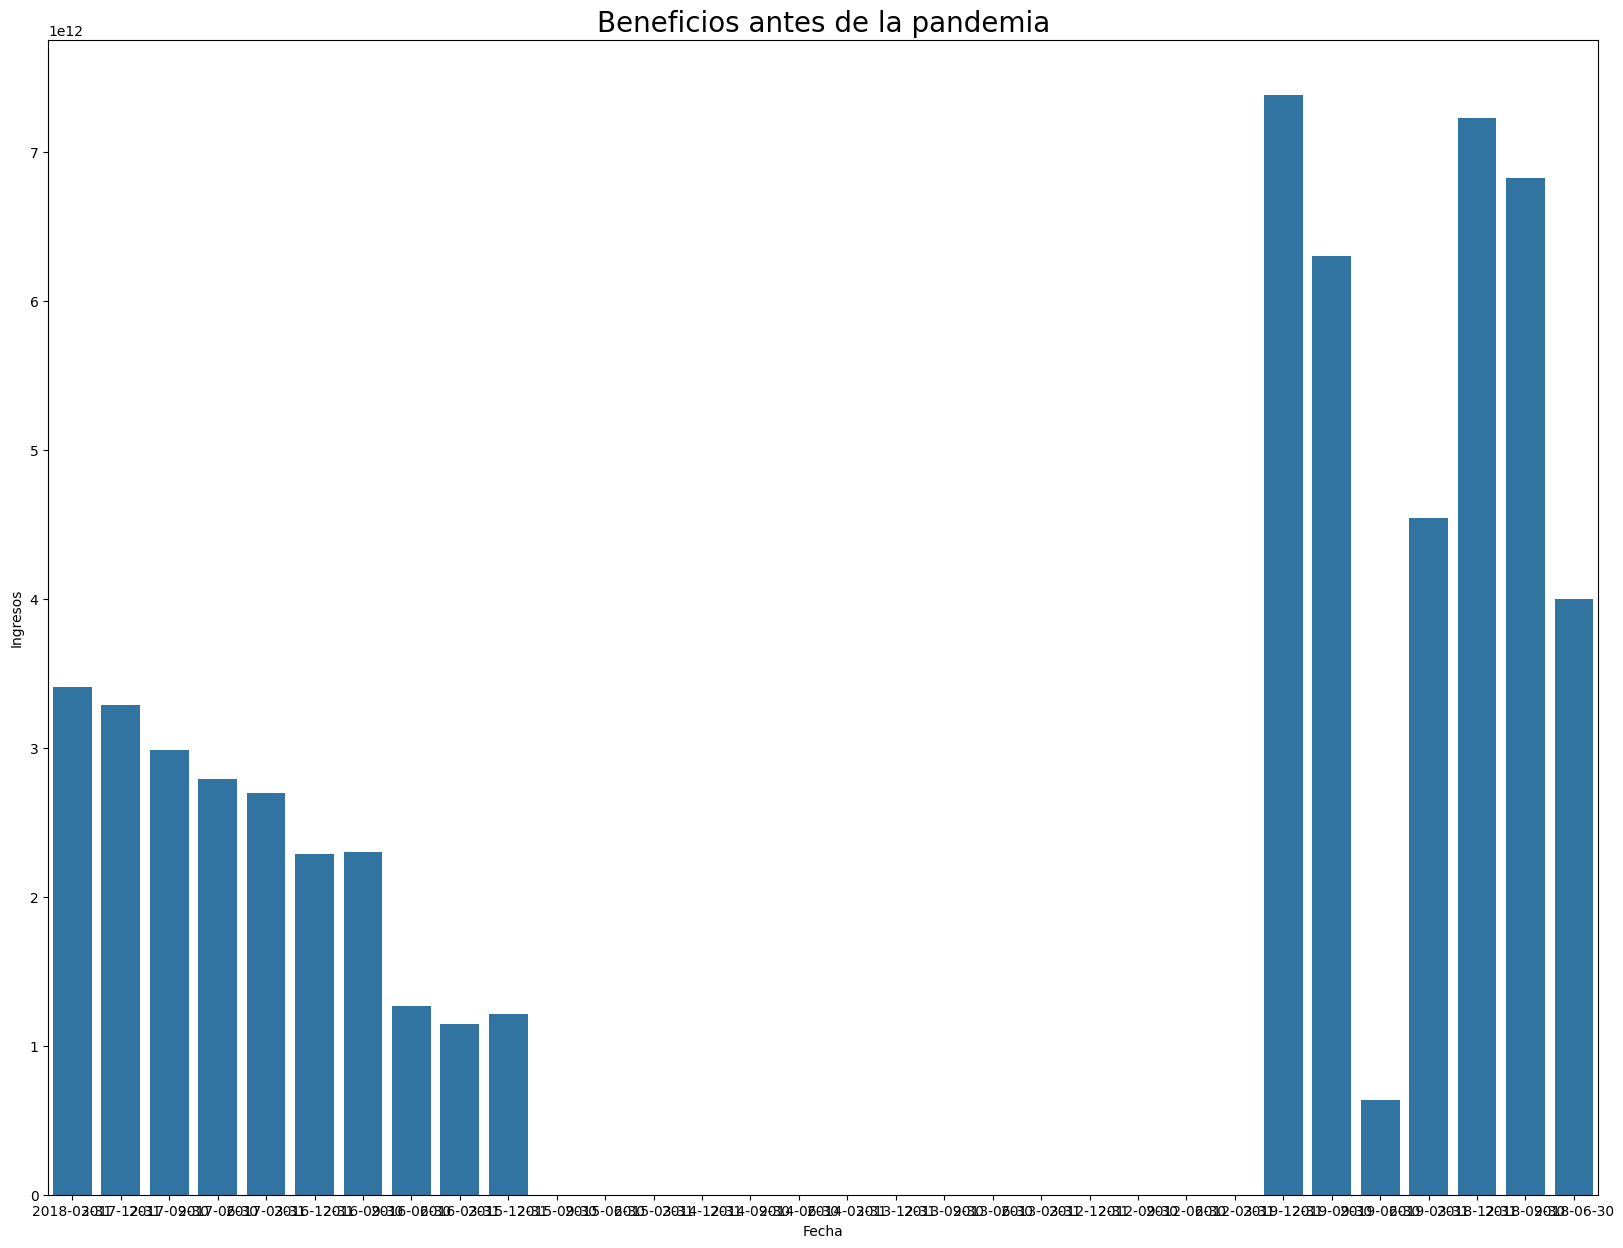

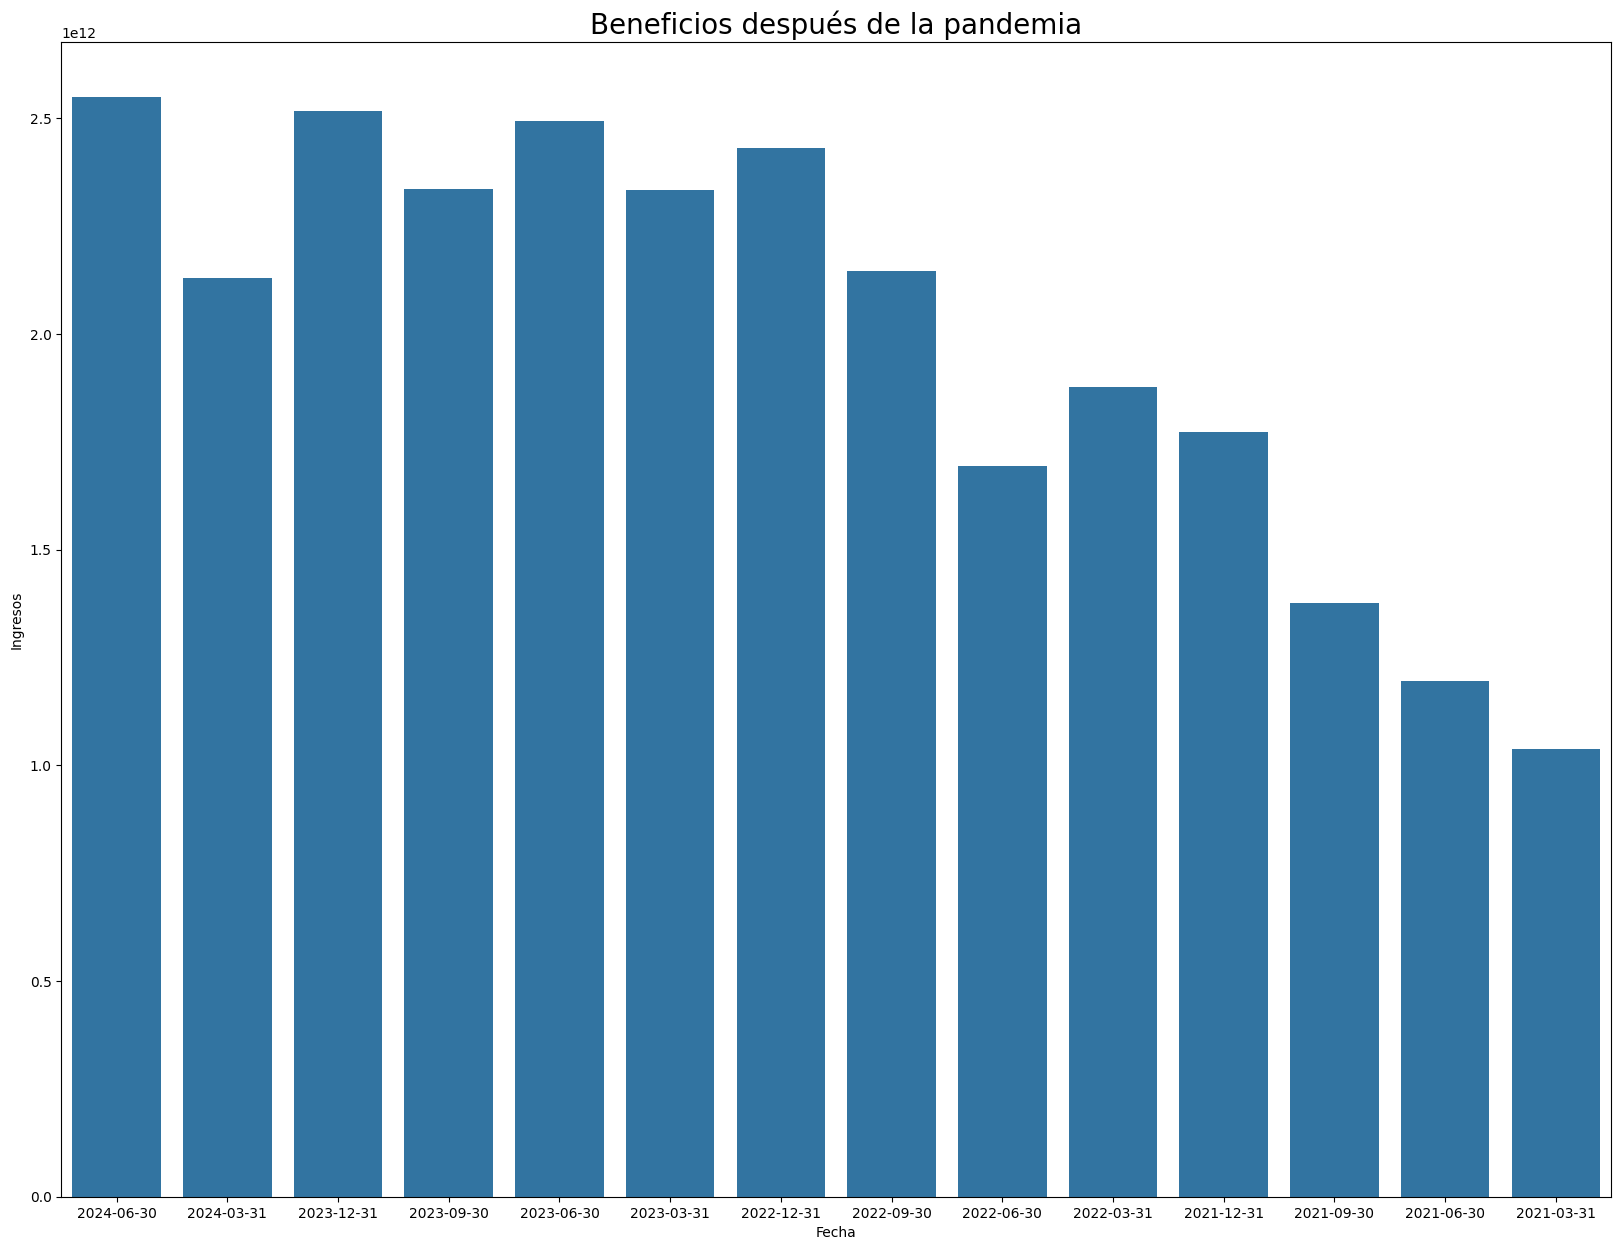

In [24]:
#TENGO UNA DUDA QUE NO LOGRO SOLUCIONAR: POR EL 2013 Y 2014 HAY VALORES CON "M" 390M. YO LO HE INTENTADO CAMBIAR CON .replace("M", "000") YA QUE CON .replace("B", "000000000") SI QUE HA FUNCIONADO, ENTONCES, AL VISUALIZAR EN TABLAS LOS RESULTADOS TENGO HUECOS VACÍOS, COMO LO SOLUCIONO?

import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url=  "https://ycharts.com/companies/TSLA/revenues"
#Headers es para que no salga error porque no sepan que eres una maquina 

headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36' }
response = requests.get(url, headers= headers)


html_data= response.text
contenido=response.content
response.status_code


soup = BeautifulSoup(html_data, "html.parser")
soup2 = BeautifulSoup(contenido, "html.parser")
#print(soup)

tablas = soup.find_all("table")




#for index, table in enumerate(tablas):
    #print(table)
    #if ("Historical Revenue (Quarterly) Data" in str(table)):
        #print("entre")
        #indice = index
        #break

q_tesla = pd.DataFrame(columns=("Fecha", "Ingresos"))

for row in tablas[1].tbody.find_all("tr"):
    columnas= row.find_all("td")
    if columnas != []:
        Fecha= columnas[0].text
        Ingresos= columnas[1].text.replace("\n", " ").strip().replace("B", "000000000").replace("M", "000").replace(".", "")
        #Ingresos=' '.join(columnas[1].text.splitlines()).strip()
    
        tesla_df = pd.DataFrame({"Fecha": [Fecha], "Ingresos": [Ingresos]})
        q_tesla = pd.concat([q_tesla, tesla_df], ignore_index=True)
        
for row in tablas[0].tbody.find_all("tr"):
    columnas= row.find_all("td")
    if columnas != []:
        Fecha= columnas[0].text
        Ingresos= columnas[1].text.replace("\n", " ").strip().replace("B", "000000000").replace("M", "000").replace(".", "")
        #Ingresos=' '.join(columnas[1].text.splitlines()).strip()
    
        tesla_df = pd.DataFrame({"Fecha": [Fecha], "Ingresos": [Ingresos]})
        q_tesla = pd.concat([q_tesla, tesla_df], ignore_index=True)


q_tesla.head()


#SQLITE

import sqlite3

conn = sqlite3.connect("Tesla.db")
conn
#Crear table
cursor = conn.cursor()
cursor.execute("""CREATE TABLE IF NOT EXISTS final (Fecha, Ingresos)""")

tupla_final = list(q_tesla.to_records(index = False))
#Rellenar tabla
cursor.executemany("INSERT INTO final VALUES (?,?)", tupla_final)
conn.commit()

for row in cursor.execute("SELECT * FROM final"):
    print(row)

#Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

q_tesla["Fecha"] = pd.to_datetime(q_tesla["Fecha"])
q_tesla["Ingresos"] = q_tesla["Ingresos"].astype('int')
sns.lineplot(data = q_tesla, x = "Fecha", y = "Ingresos")

plt.show()


q_tesla['Fecha'] = pd.to_datetime(q_tesla['Fecha'], errors='coerce')
q_tesla_pre = q_tesla[q_tesla['Fecha'].dt.year < 2020]
fig, axis = plt.subplots(figsize=(20, 15))

sns.barplot(data=q_tesla_pre, x="Fecha", y="Ingresos", ax=axis)

axis.set_title('Beneficios antes de la pandemia', fontsize=20)

plt.show()

q_tesla['Fecha'] = pd.to_datetime(q_tesla['Fecha'], errors='coerce')
q_tesla_pre = q_tesla[q_tesla['Fecha'].dt.year > 2020]
fig, axis = plt.subplots(figsize=(20, 15))

sns.barplot(data=q_tesla_pre, x="Fecha", y="Ingresos", ax=axis)

axis.set_title('Beneficios después de la pandemia', fontsize=20)

plt.show()
